In [1]:
import pandas as pd
df=pd.read_excel('data/card.xls',sheet_name='Data')
print(df.shape)
df.head(3)

(30001, 25)


Unnamed: 0         X1   X2         X3        X4   X5     X6     X7     X8  \
0         ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3   
1          1      20000    2          2         1   24      2      2     -1   
2          2     120000    2          2         2   26     -1      2      0   

      X9  ...        X15        X16        X17       X18       X19       X20  \
0  PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3   
1     -1  ...          0          0          0         0       689         0   
2      0  ...       3272       3455       3261         0      1000      1000   

        X21       X22       X23                           Y  
0  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
1         0         0         0                           1  
2      1000         0      2000                           1  

[3 rows x 25 columns]

In [12]:
df.iloc[0].values

array(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'default payment next month'], dtype=object)

In [86]:
X_features=X_features.drop('ID',axis=1,inplace=False)


In [20]:
df.rename(columns={'PAY_0':'PAY_1','default payment next month':'default'},inplace=True)
y_target=df['default']
X_features=df.drop('default',axis=1)

In [87]:
X_float=X_features.astype('float32')

In [91]:
X_features=X_float

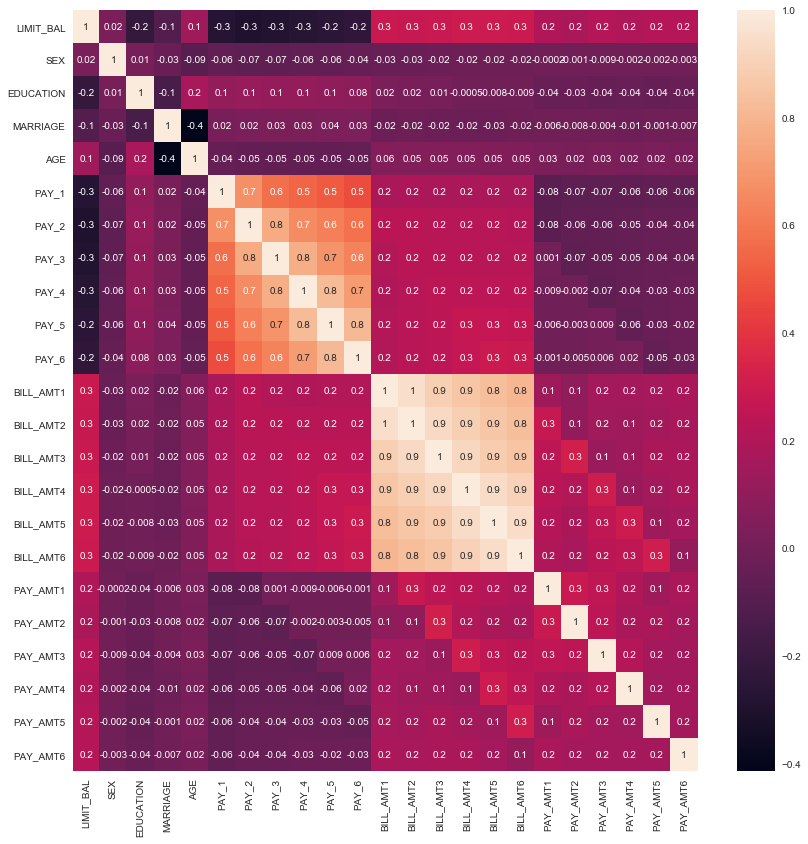

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

corr=X_float.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr,annot=True,fmt='.1g')

In [90]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

cols_bill=['BILL_AMT'+str(i) for i in range(1,7)]
print(cols_bill)

['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']


In [93]:
scaler=StandardScaler()
df_cols_scaled=scaler.fit_transform(X_features[cols_bill])
pca=PCA(n_components=2)
pca.fit(df_cols_scaled)
print(pca.explained_variance_ratio_)

[0.90555245 0.05098669]


In [99]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf=RandomForestClassifier(n_estimators=300 , random_state=156)
scores=cross_val_score(rcf,X_features,y_target,scoring='accuracy',cv=3)
print(scores)
print(np.mean(scores))

[0.8083 0.8196 0.8232]
0.8170333333333333


In [100]:
scaler=StandardScaler()
df_scaled=scaler.fit_transform(X_features)
pca=PCA(n_components=6)
df_pca=pca.fit_transform(X_features)
scores_pca=cross_val_score(rcf,df_pca,y_target,cv=3)
print(scores_pca)
scores_pca.mean()


[0.7716 0.78   0.7815]


0.7777